In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.fft import fft, fftfreq

from fourierAlgos import *

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

# 2.4 Discrete Fourier Transform (DFT)

Functions are period in the variable $t$ if it keeps repeating after each interval T

\begin{equation*}
    y(t+T) = y(t)
\end{equation*}

$T$ is called the <i>fundamental period</i> and we can define the <i>fundamental frequency</i> $\omega$

\begin{equation*}
    \omega = \frac{2\pi}{T}
\end{equation*}

Given a set $\{y_i\}$ of $N$ signal measuremensts at times $t_i$, $i=1,...,N$ <i>Fourier's theorem</i> states that any single valued, periodic functions with at most a finite number of discountinuities can be approximated as the infinite series:

\begin{equation*}
    y(t) \simeq \frac{a_0}{2} + \sum_{n=1}^{\infty}(a_n \cos n\omega t + b_n \sin n\omega t)
\end{equation*}

<b><i>What does those coefficients mean?</i></b>

The coefficients $a_n, b_n$ represent the amount of $\cos n\omega t$ and $\sin n\omega t$ present in $y(t)$

\begin{align}
    \begin{pmatrix}
        a_n \\ b_n
    \end{pmatrix} = \frac{2}{T}\int_{0}^T dt 
    \begin{pmatrix}
        \cos n\omega t \\ \sin n\omega t 
    \end{pmatrix} y(t)
\end{align}

<b><i>What if the function we're trying to approximate is not periodic?</i></b>

A <i>Fourier Integral</i> would be a more accurate representation 

\begin{equation*}
    y(t) = \int_{-\infty}^{+\infty} d\omega Y(\omega) \frac{e^{i\omega t}}{\sqrt{2\pi}}
\end{equation*}

where the Fourier transform $Y(\omega)$ is analogous to the Fourier coefficients $(a_n, b_n)$:

\begin{equation*}
    Y(\omega) = \int_{-\infty}^{+\infty} dt \frac{e^{-i\omega t}}{\sqrt{2\pi}} y(t)
\end{equation*}


#### Discrete Fourier Transform

In this algorithm, we assume the signal is measured at only a finite number $N$ of <i>uniform</i> time intervals $\Delta t = h$, for a total time $T=Nh$:

\begin{equation*}
    y_k \overset{def}{=} y(t_k), \quad t_k \overset{def}{=} kh, \quad k=0,1,2,...,N
\end{equation*}

The algorithm evaluates the integral for the Fourier transform by using the equally spaced measurements $\{y_i\}$ and the <font color='red'>trapezoidal integration rule</font>:

\begin{align*}
    Y(\omega_n) &\overset{def}{=} \int_{-\infty}^{+\infty} dt \frac{e^{-i\omega_n t}}{\sqrt{2\pi}}y(t) \simeq \int_0^T dt \frac{e^{-i\omega_n t}}{\sqrt(2\pi)}y(t) \\\\

    &\simeq \sum_{k=1}^N h y(t_k) \frac{e^{-i\omega_n t_k}}{\sqrt{2\pi}} = h \sum_{k=1}^{N} y_k \frac{e^{-2\pi ikn/N}}{\sqrt{2\pi}}
\end{align*}

To make the notation symmetric, the step size $h$ is factored out from Y:

\begin{align*}
    Y_n \overset{def}{=} \frac{1}{h} Y(\omega_n) &= h \sum_{k=1}^{N} y_k \frac{e^{-2\pi ikn/N}}{\sqrt{2\pi}}, \qquad n=0,1,...,N \\
    \rightarrow y(t) &\simeq \sum_{n=1}^{N} \frac{2\pi}{N} \frac{e^{i\omega_n t}}{\sqrt{2\pi}} Y_n, \qquad \omega_n = n\omega_1 = n\frac{2\pi}{T} = n\frac{2\pi}{Nh}
\end{align*}

Regardless of the true periodicity of the signal, when we sample the signal over a finite period $T$, the mathematics produces a $y(t)$ that is periodic. To build this periodicity into the algorithm by having a fictitious measurement $Y_N$ at time $Nh$ that is equal to the first signal measurement:

\begin{equation*}
    y_N = y_0
\end{equation*}

We can see from the definition of $\omega_n$ that the larger we make the time $T=Nh$, the smaller the frequency steps will be. Therefore, a longer observation time $T$ creates a smoother frequency spectrum.

<b>Let's express the DFT algorithm differently using complex variable Z</b>:

\begin{equation*}
    y_k = \frac{\sqrt{2\pi}}{N} \sum_{n=1}^N Z^{-nk}Y_n, \quad Y_n = \frac{1}{\sqrt{2\pi}}\sum_{k=1}^N Z^{nk} y_k, \quad Z = e^{-2\pi i/N}
\end{equation*}

Let's work on some problems!

##### Question 1

It is always a good idea to perform simple checks before applying your own or packaged Fourier tools. And so, sample the mixed-symmetry signal

\begin{equation*}
    y(t) = 5\sin(\omega t) + 2\cos(3\omega t) + \sin(5\omega t)
\end{equation*}

<font size = "-1">a. Decompose it into it's components

b. Check that the components are essentially imaginary and in the ratio 5:2:1

c. Verify that the frequencies have the expected values

d. Verify that the summed transformation values reproduce the input signal</font>

First, we generate the sample signal that we want to analyze:

In [4]:
N = 400
h = 0.1

t = np.arange(0, 10*2*pi, h)

y = 5*np.sin(t) + 2*np.cos(3*t) + np.sin(5*t)

y1 = 5*np.sin(t) 
y2 = 2*np.cos(3*t)
y3 = np.sin(5*t)

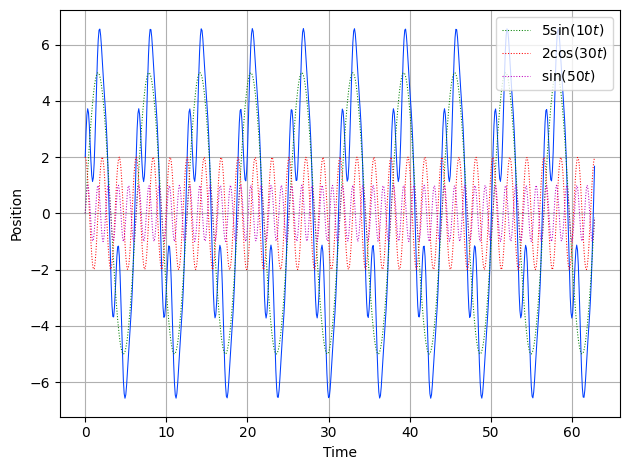

In [5]:
plt.plot(t, y)
plt.plot(t, y1, 'g:', label= '$5\\sin(10t)$')
plt.plot(t, y2, 'r:', label= '$2\\cos(30t)$')
plt.plot(t, y3, 'm:', label= '$\\sin(50t)$')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

Once we have the signal, we take the position values and input them into the the <i>discrete fourier transform</i> function, making aware that we are roughly representing the period of the oscillation.

In [6]:
def DFT(y: 'ndarray', N, h):
    """
    Parameters
    ----------
    y : ndarray
        This is the array of the function values y(t) that are used to calculate the Fourier Transform Y(omega)
    
    Returns
    -------
    N_list : ndarray
        The omega values
    Y : ndarray
        The absolute value of the imaginary component of the Fourier Transform
    """
    N = size(y)

    Y = zeros((N,), dtype= complex128)
    N_list = zeros((N,))

    for n in range(0,N):    
        for k in range(0,N): 
            Y[n] += y[k]*exp(-pi*2j*n*k/N)
        
        Y[n] = (1/sqrt(2*pi))*Y[n]
        N_list[n] = n*((2*pi)/(N*h))

    return np.array(N_list), np.array(Y)



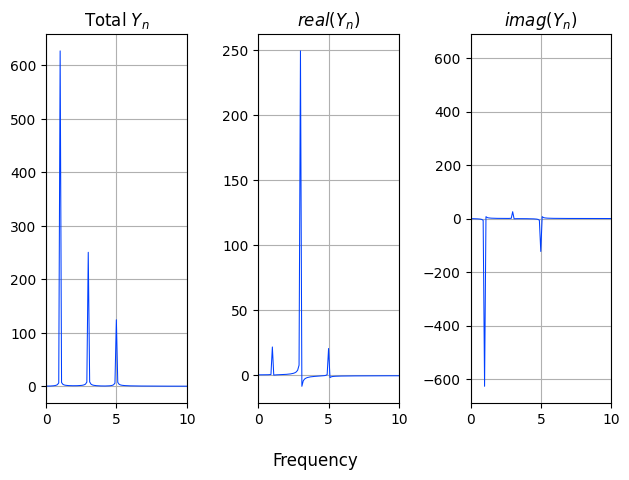

In [7]:
omegaf, yf = DFT(y, len(y), h)

fig1, ax1 = plt.subplots(1, 3)

ax1[0].set_xlim(0,10)
ax1[0].set_title('Total $Y_n$')
ax1[0].plot(omegaf, abs(yf)) # Plotting the total magnitude of the complex number

ax1[1].set_xlim(0, 10)
ax1[1].set_title('$real(Y_n)$')
ax1[1].plot(omegaf, yf.real)

ax1[2].set_xlim(0,10)
ax1[2].set_title('$imag(Y_n)$')
ax1[2].plot(omegaf, yf.imag)

fig1.supxlabel('Frequency')

plt.show()

<b><i>What can you tell from reading these graphs?</i></b>

From the graph of the total Fourier component $Y_n$, the frequency of a component can be read off the horizontal axis and the present strength of oscillation frequency can be read off the vertical axis. We can easily see that the frequencies displayed in the Fourier components match the frequencies present in the signal and at the relative amplitudes of the signal.

<b><i>What's happening with just the real and imaginary parts of the Fourier components?</i></b>

The real and imaginary components of the Fourier component are associated with whether the frequency appears to be more aligned with a $\sin$ wave frequency or $\cos$ wave frequency. This is easy to see if we remember that 

\begin{align*}
    e^{-i\omega t} &= cos(\omega t) - i sin(\omega t) \\
    real(e^{-i\omega t}) &=  cos(\omega t)\\
    imag(e^{-i\omega t}) &= - sin(\omega t)
\end{align*}

or by looking back at how we originally thought of the analogy between $(a_n, b_n)$ and the $Y(\omega)$ coefficients

Below, we've implemented an inverse discrete fourier transform to return the original signal using the Fourier coefficients.

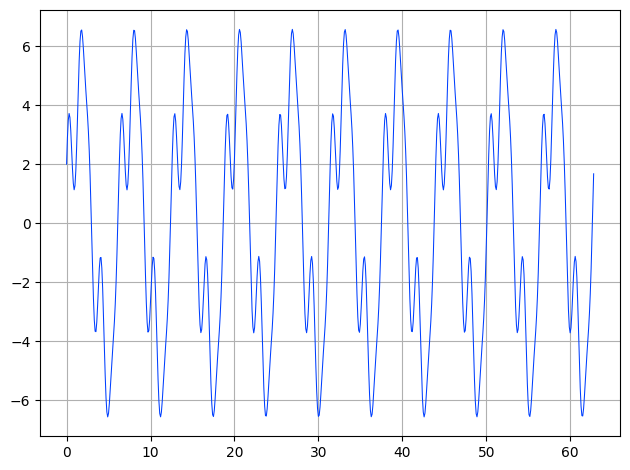

In [8]:
def invDFT(Y:'list', h:'float'):
    """
    Parameters
    ----------
    Y : ndarray
        This is the array of the function values y(t) that are used to calculate the Fourier Transform Y(omega)

    h : float
        uniform time step used in the Fourier Transform
        
    Returns
    -------
    N_list : ndarray
        The omega values
    Y : ndarray
        The absolute value of the imaginary component of the Fourier Transform
    """
    N = size(Y)
    y = zeros((N,), complex128)
    t = zeros((N,))

    for k in range(0,N):
        for n in range(0, N):
            y[k] += Y[n]*exp(pi*2j*n*k/N)
        
        y[k] = y[k]*((sqrt(2*pi)/N))
        t[k] = k*h

    return t, y.real
    
t, y = invDFT(yf, h)

plt.plot(t, y)
plt.show()

##### Question 2

Sum the Fourier series for the sawtooth function up to order $n = 2,4,10,20$ and plot the results over two periods.

<font size="-1">a. Check that in each case the series gives the mean value of the function at the points of discontinuity.

b. Check that in each case the series overshoots by about 9% the value of the function on either side of the discontinuity (the Gibbs overshoot).

c. Experiment on the effects of picking different values of the step size h and of enlarging the measurement period T = Nh.</font>

Let's first try to graph the fourier series of the sawtooth wavefunction. To do this, we looked up the fourier series on Wolfram Alpha and changed it a bit to make it better for personal use. I end up plotting this:

\begin{equation*}
    f(x) = \frac{1}{\pi} \sum_{k=1}^{n} \frac{1}{k} \sin\left(\frac{2\pi k x}{L}\right)
\end{equation*}


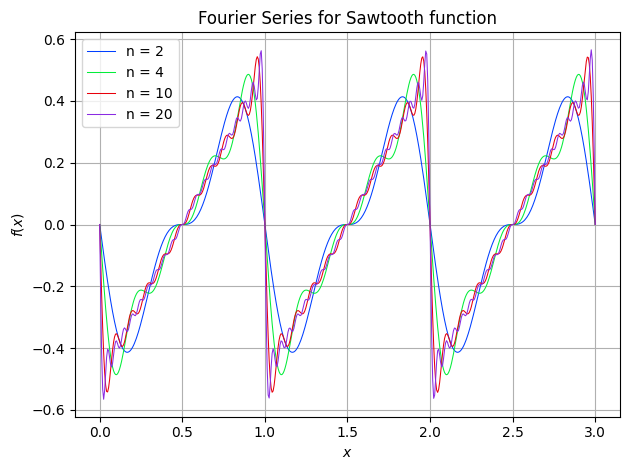

In [9]:
L = 1
h = 0.1

t = np.arange(0, 10*2*pi+h, h)

def sawtooth(N, T, n):
    """
    Parameters
    ----------
    N : int
        Amount of x points that will occur
    
    n : int
        Order of the sum used 

    T : int
        Number of periods we want to look through
        
    Returns
    -------
    x : ndarray
        the x array that are evaluated by the function
    y : ndarray
        Function values for the sawtooth array
    """
    h = (T*L)/N # Notice here that time steps depend on the length of the sawtooth, the number of x points to evalute, and the number of periods that we want to view

    y = np.zeros(N+1)
    x = np.zeros(N+1)

    for i in range(0,N):
        x[i+1] = x[i] + h

    for i in range(0,N):
        for k in range(1,n+1):
            y[i] += (1/k)*np.sin((2*np.pi*k*x[i])/L)

        y[i] = - (1/np.pi)*y[i]
        
    return x, y

N = 500 ; T = 3
acc = [2,4,10,20]

for i in range(len(acc)):
    vars()['sawX'+str(acc[i])] , vars()['sawY'+str(acc[i])] = sawtooth(N,T,acc[i])

    plt.plot(vars()['sawX'+str(acc[i])], vars()['sawY'+str(acc[i])], label = "n = " + str(acc[i]))

plt.title("Fourier Series for Sawtooth function")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

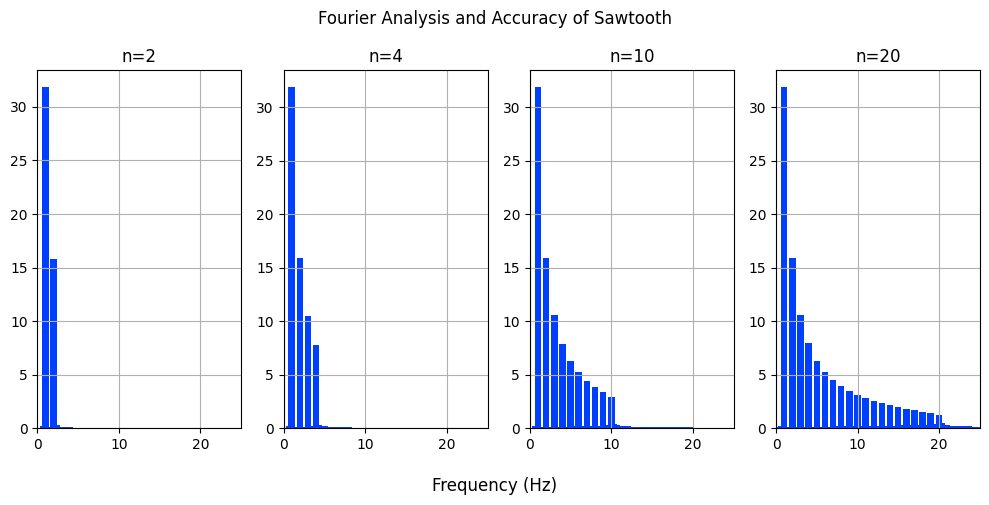

In [10]:
fig, ax = plt.subplots(1, 4, figsize = (10, 5))

for i in range(len(acc)):
    vars()['sawFreq'+str(acc[i])] , vars()['sawFourier'+str(acc[i])] = DFT(vars()['sawY'+str(acc[i])], len(vars()['sawX'+str(acc[i])]), (T*L*2*np.pi)/N)

    ax[i].bar(vars()['sawFreq'+str(acc[i])], abs(vars()['sawFourier'+str(acc[i])]))
    ax[i].set_title("n="+str(acc[i]))
    ax[i].set_xlim(0,25)

fig.suptitle('Fourier Analysis and Accuracy of Sawtooth')
fig.supxlabel('Frequency (Hz)')
plt.show()

From the graphs above, notice all the frequencies of the $\sin$ functions that were added to create each sawtooth function were returned. Also notice that the strength of the frequencies dies down as $1/x$ which makes sense because each respective $\sin(\alpha k)$ term is multiplied by the respective $1/k$.

##### Question 3

An electron initially localized at $x_0=0$ with momentum  $k_0=3$ (<i>really this is the wave number, but it's equal to momentum by $p = \hbar k$</i>) is described by the wave packet $(\hbar = 1)$:

\begin{equation*}
    \psi(x, t=0) = \frac{1}{\pi^{1/4}\sqrt{\sigma_0}}\exp\left(-\frac{1}{2}\left(\frac{x-x_0}{\sigma_0}\right)^2\right) e^{ik_0x}
\end{equation*}

In [11]:
x0 = 0
k0 = 3
sigma = 1
dx = 0.1

x = np.arange(-100, 100+dx, dx)

##  Normalized wave packet
psi_x = (1/(np.pi**0.25))*np.exp(-0.5 * ((x - x0) / sigma) ** 2) * np.exp(1j * k0 * x) 

In [12]:
psi_p = DFT(psi_x, len(x), dx)

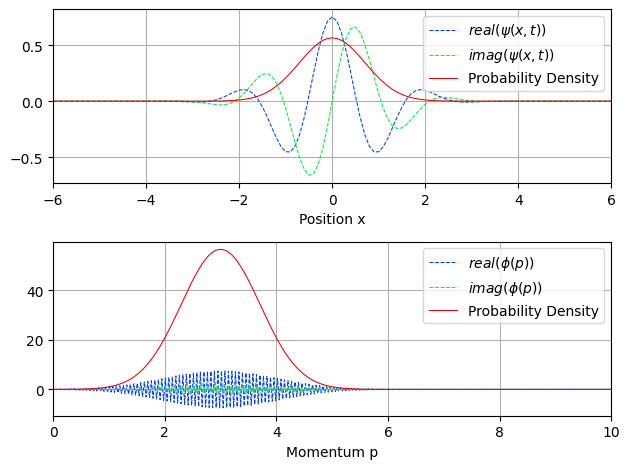

In [43]:
fig, (axX, axP) = plt.subplots(2, 1)

axX.plot(x, psi_x.real, '--', label = '$real(\\psi(x,t))$')
axX.plot(x, psi_x.imag, '--', label = '$imag(\\psi(x,t))$')
axX.plot(x, abs(psi_x)**2, label = 'Probability Density')
axX.set_xlim(-6, 6)
axX.set_xlabel('Position x')
axX.legend()

p = psi_p[0]
Y_k = psi_p[1]

axP.set_xlim(0, 10)
axP.plot(p, Y_k.real, '--', label = '$real(\\phi(p))$')
axP.plot(p, Y_k.imag, '--', label = '$imag(\\phi(p))$')
axP.plot(p, abs(Y_k)**2, label = 'Probability Density')
axP.set_xlabel('Momentum p')
axP.legend()
plt.show()

From the code above, we can see that te gaussiance behavior in the position space wavefunction still holds when transformed to momentum space. We can also notice that the momentum wavefunction isn't normalized, but the position wavefunction is. This is because we cannot actually take the fourier integrals to $(-\infty, \infty)$. However, I did notice that the more points that are plotted in position space, the smaller the momentum probability density becomes.